In [1]:
import logging

import mrcfile
import numpy as np

from aspire.basis import FFBBasis2D, FSPCABasis
from aspire.classification import RIRClass2D
from aspire.image import Image
from aspire.operators import ScalarFilter

# from aspire.source import ArrayImageSource # Helpful hint if you want to BYO array.
from aspire.source import Simulation
from aspire.volume import Volume

logger = logging.getLogger(__name__)


In [2]:
##################################################
# Parameters
RESOLUTION = 64  # 300 used in paper (but needs a higher res source)
NUMBER_OF_TEST_IMAGES = 4096  # 24000 images in paper, 4096 is sufficient for clean dev.
DTYPE = np.float64
noise = 0.01 # zero for clean, 0.001 for dirty, 0.1 static

2021-06-04 14:25:37,103 INFO Appending a NoiseAdder to generation pipeline
2021-06-04 14:25:37,109 INFO Trying NFFT backend finufft
2021-06-04 14:25:37,112 INFO NFFT backend finufft usable.
2021-06-04 14:25:37,113 INFO Trying NFFT backend cufinufft
2021-06-04 14:25:37,114 INFO NFFT backend cufinufft not usable:
	No module named 'pycuda'
2021-06-04 14:25:37,115 INFO Trying NFFT backend pynfft
2021-06-04 14:25:37,116 INFO NFFT backend pynfft not usable:
	No module named 'pynfft'
2021-06-04 14:25:37,116 INFO Selected NFFT backend = finufft.
2021-06-04 14:25:37,511 INFO Applying forward transformations in pipeline
2021-06-04 14:25:37,511 INFO All forward transformations applied
2021-06-04 14:25:37,512 INFO Loaded 10 images


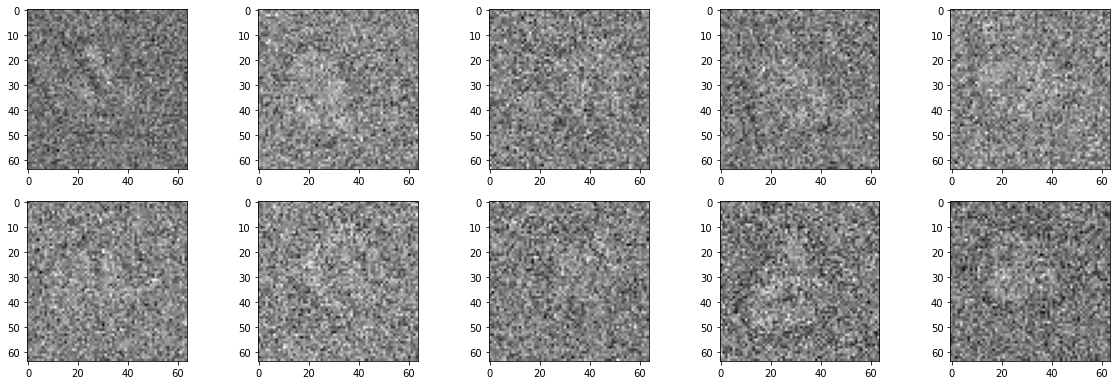

In [3]:
# Generate some projections downsampled to RESOLUTION
fh = mrcfile.open("../data/clean70SRibosome_vol_65p.mrc")  # ASPIRE_ROOT/tutorials/data/
v = Volume(fh.data.astype(DTYPE))
v = v.downsample((RESOLUTION,) * 3)

noise_var = noise * np.var(np.sum(v[0],axis=0))
noise_filter = ScalarFilter(dim=2, value=noise_var)

src = Simulation(
    L=v.resolution,
    n=NUMBER_OF_TEST_IMAGES,
    vols=v,
    dtype=DTYPE,
    noise_filter=noise_filter,
)
src.images(0, 10).show()

In [4]:
logger.info("Setting up FFB")
# Setup a Basis
basis = FFBBasis2D((RESOLUTION, RESOLUTION), dtype=DTYPE)
coefs = basis.evaluate_t(src.images(0, NUMBER_OF_TEST_IMAGES))

2021-06-04 14:25:38,450 INFO Setting up FFB
2021-06-04 14:25:38,451 INFO Expanding 2D image in a frequency-domain Fourier–Bessel basis using the fast method.
2021-06-04 14:26:00,970 INFO Applying forward transformations in pipeline
2021-06-04 14:26:00,971 INFO All forward transformations applied
2021-06-04 14:26:00,971 INFO Loaded 4096 images


In [5]:
logger.info("Setting up FSPCA")
fspca_basis = FSPCABasis(src, basis)
fspca_basis.build(coefs)
logger.info("FSPCA Complete")

2021-06-04 14:26:05,779 INFO Setting up FSPCA
2021-06-04 14:26:05,780 INFO 0, 0, 0, 1
2021-06-04 14:26:05,780 INFO 1, 0, 1, 1
2021-06-04 14:26:05,781 INFO 2, 0, 2, 1
2021-06-04 14:26:05,781 INFO 3, 0, 3, 1
2021-06-04 14:26:05,782 INFO 4, 0, 4, 1
2021-06-04 14:26:05,783 INFO 5, 0, 5, 1
2021-06-04 14:26:05,783 INFO 6, 0, 6, 1
2021-06-04 14:26:05,784 INFO 7, 0, 7, 1
2021-06-04 14:26:05,784 INFO 8, 0, 8, 1
2021-06-04 14:26:05,784 INFO 9, 0, 9, 1
2021-06-04 14:26:05,785 INFO 10, 0, 10, 1
2021-06-04 14:26:05,786 INFO 11, 0, 11, 1
2021-06-04 14:26:05,786 INFO 12, 0, 12, 1
2021-06-04 14:26:05,787 INFO 13, 0, 13, 1
2021-06-04 14:26:05,787 INFO 14, 0, 14, 1
2021-06-04 14:26:05,788 INFO 15, 0, 15, 1
2021-06-04 14:26:05,788 INFO 16, 0, 16, 1
2021-06-04 14:26:05,789 INFO 17, 0, 17, 1
2021-06-04 14:26:05,789 INFO 18, 0, 18, 1
2021-06-04 14:26:05,790 INFO 19, 0, 19, 1
2021-06-04 14:26:05,790 INFO 20, 0, 20, 1
2021-06-04 14:26:05,790 INFO 21, 0, 21, 1
2021-06-04 14:26:05,791 INFO 22, 0, 22, 1
2021-06-

2021-06-04 14:26:05,894 INFO 192, 3, 6, -1
2021-06-04 14:26:05,895 INFO 193, 3, 7, -1
2021-06-04 14:26:05,895 INFO 194, 3, 8, -1
2021-06-04 14:26:05,896 INFO 195, 3, 9, -1
2021-06-04 14:26:05,896 INFO 196, 3, 10, -1
2021-06-04 14:26:05,897 INFO 197, 3, 11, -1
2021-06-04 14:26:05,897 INFO 198, 3, 12, -1
2021-06-04 14:26:05,898 INFO 199, 3, 13, -1
2021-06-04 14:26:05,899 INFO 200, 3, 14, -1
2021-06-04 14:26:05,899 INFO 201, 3, 15, -1
2021-06-04 14:26:05,900 INFO 202, 3, 16, -1
2021-06-04 14:26:05,901 INFO 203, 3, 17, -1
2021-06-04 14:26:05,901 INFO 204, 3, 18, -1
2021-06-04 14:26:05,901 INFO 205, 3, 19, -1
2021-06-04 14:26:05,902 INFO 206, 3, 20, -1
2021-06-04 14:26:05,902 INFO 207, 3, 21, -1
2021-06-04 14:26:05,902 INFO 208, 3, 22, -1
2021-06-04 14:26:05,903 INFO 209, 3, 23, -1
2021-06-04 14:26:05,903 INFO 210, 3, 24, -1
2021-06-04 14:26:05,903 INFO 211, 3, 25, -1
2021-06-04 14:26:05,904 INFO 212, 3, 26, -1
2021-06-04 14:26:05,904 INFO 213, 3, 27, -1
2021-06-04 14:26:05,904 INFO 214, 3,

2021-06-04 14:26:05,992 INFO 382, 6, 19, -1
2021-06-04 14:26:05,993 INFO 383, 6, 20, -1
2021-06-04 14:26:05,993 INFO 384, 6, 21, -1
2021-06-04 14:26:05,993 INFO 385, 6, 22, -1
2021-06-04 14:26:05,994 INFO 386, 6, 23, -1
2021-06-04 14:26:05,995 INFO 387, 6, 24, -1
2021-06-04 14:26:05,996 INFO 388, 6, 25, -1
2021-06-04 14:26:05,996 INFO 389, 6, 26, -1
2021-06-04 14:26:05,997 INFO 390, 6, 27, -1
2021-06-04 14:26:05,997 INFO 391, 6, 28, -1
2021-06-04 14:26:05,997 INFO 392, 7, 0, 1
2021-06-04 14:26:05,998 INFO 393, 7, 1, 1
2021-06-04 14:26:05,998 INFO 394, 7, 2, 1
2021-06-04 14:26:05,999 INFO 395, 7, 3, 1
2021-06-04 14:26:05,999 INFO 396, 7, 4, 1
2021-06-04 14:26:06,000 INFO 397, 7, 5, 1
2021-06-04 14:26:06,001 INFO 398, 7, 6, 1
2021-06-04 14:26:06,002 INFO 399, 7, 7, 1
2021-06-04 14:26:06,002 INFO 400, 7, 8, 1
2021-06-04 14:26:06,002 INFO 401, 7, 9, 1
2021-06-04 14:26:06,003 INFO 402, 7, 10, 1
2021-06-04 14:26:06,003 INFO 403, 7, 11, 1
2021-06-04 14:26:06,004 INFO 404, 7, 12, 1
2021-06-04 

2021-06-04 14:26:06,090 INFO 572, 10, 14, 1
2021-06-04 14:26:06,090 INFO 573, 10, 15, 1
2021-06-04 14:26:06,091 INFO 574, 10, 16, 1
2021-06-04 14:26:06,092 INFO 575, 10, 17, 1
2021-06-04 14:26:06,093 INFO 576, 10, 18, 1
2021-06-04 14:26:06,093 INFO 577, 10, 19, 1
2021-06-04 14:26:06,094 INFO 578, 10, 20, 1
2021-06-04 14:26:06,094 INFO 579, 10, 21, 1
2021-06-04 14:26:06,095 INFO 580, 10, 22, 1
2021-06-04 14:26:06,096 INFO 581, 10, 23, 1
2021-06-04 14:26:06,096 INFO 582, 10, 24, 1
2021-06-04 14:26:06,096 INFO 583, 10, 25, 1
2021-06-04 14:26:06,097 INFO 584, 10, 26, 1
2021-06-04 14:26:06,098 INFO 585, 10, 0, -1
2021-06-04 14:26:06,098 INFO 586, 10, 1, -1
2021-06-04 14:26:06,098 INFO 587, 10, 2, -1
2021-06-04 14:26:06,099 INFO 588, 10, 3, -1
2021-06-04 14:26:06,100 INFO 589, 10, 4, -1
2021-06-04 14:26:06,100 INFO 590, 10, 5, -1
2021-06-04 14:26:06,101 INFO 591, 10, 6, -1
2021-06-04 14:26:06,101 INFO 592, 10, 7, -1
2021-06-04 14:26:06,102 INFO 593, 10, 8, -1
2021-06-04 14:26:06,102 INFO 594

2021-06-04 14:26:06,199 INFO 757, 13, 15, -1
2021-06-04 14:26:06,200 INFO 758, 13, 16, -1
2021-06-04 14:26:06,200 INFO 759, 13, 17, -1
2021-06-04 14:26:06,202 INFO 760, 13, 18, -1
2021-06-04 14:26:06,203 INFO 761, 13, 19, -1
2021-06-04 14:26:06,203 INFO 762, 13, 20, -1
2021-06-04 14:26:06,204 INFO 763, 13, 21, -1
2021-06-04 14:26:06,205 INFO 764, 13, 22, -1
2021-06-04 14:26:06,205 INFO 765, 13, 23, -1
2021-06-04 14:26:06,206 INFO 766, 13, 24, -1
2021-06-04 14:26:06,206 INFO 767, 13, 25, -1
2021-06-04 14:26:06,206 INFO 768, 14, 0, 1
2021-06-04 14:26:06,207 INFO 769, 14, 1, 1
2021-06-04 14:26:06,207 INFO 770, 14, 2, 1
2021-06-04 14:26:06,208 INFO 771, 14, 3, 1
2021-06-04 14:26:06,209 INFO 772, 14, 4, 1
2021-06-04 14:26:06,209 INFO 773, 14, 5, 1
2021-06-04 14:26:06,209 INFO 774, 14, 6, 1
2021-06-04 14:26:06,211 INFO 775, 14, 7, 1
2021-06-04 14:26:06,212 INFO 776, 14, 8, 1
2021-06-04 14:26:06,212 INFO 777, 14, 9, 1
2021-06-04 14:26:06,213 INFO 778, 14, 10, 1
2021-06-04 14:26:06,213 INFO 77

2021-06-04 14:26:06,299 INFO 943, 17, 3, -1
2021-06-04 14:26:06,299 INFO 944, 17, 4, -1
2021-06-04 14:26:06,300 INFO 945, 17, 5, -1
2021-06-04 14:26:06,300 INFO 946, 17, 6, -1
2021-06-04 14:26:06,300 INFO 947, 17, 7, -1
2021-06-04 14:26:06,301 INFO 948, 17, 8, -1
2021-06-04 14:26:06,301 INFO 949, 17, 9, -1
2021-06-04 14:26:06,302 INFO 950, 17, 10, -1
2021-06-04 14:26:06,302 INFO 951, 17, 11, -1
2021-06-04 14:26:06,303 INFO 952, 17, 12, -1
2021-06-04 14:26:06,303 INFO 953, 17, 13, -1
2021-06-04 14:26:06,304 INFO 954, 17, 14, -1
2021-06-04 14:26:06,304 INFO 955, 17, 15, -1
2021-06-04 14:26:06,305 INFO 956, 17, 16, -1
2021-06-04 14:26:06,305 INFO 957, 17, 17, -1
2021-06-04 14:26:06,306 INFO 958, 17, 18, -1
2021-06-04 14:26:06,306 INFO 959, 17, 19, -1
2021-06-04 14:26:06,307 INFO 960, 17, 20, -1
2021-06-04 14:26:06,307 INFO 961, 17, 21, -1
2021-06-04 14:26:06,308 INFO 962, 17, 22, -1
2021-06-04 14:26:06,308 INFO 963, 17, 23, -1
2021-06-04 14:26:06,309 INFO 964, 18, 0, 1
2021-06-04 14:26:06

2021-06-04 14:26:06,387 INFO 1127, 21, 5, -1
2021-06-04 14:26:06,388 INFO 1128, 21, 6, -1
2021-06-04 14:26:06,388 INFO 1129, 21, 7, -1
2021-06-04 14:26:06,389 INFO 1130, 21, 8, -1
2021-06-04 14:26:06,389 INFO 1131, 21, 9, -1
2021-06-04 14:26:06,390 INFO 1132, 21, 10, -1
2021-06-04 14:26:06,390 INFO 1133, 21, 11, -1
2021-06-04 14:26:06,391 INFO 1134, 21, 12, -1
2021-06-04 14:26:06,391 INFO 1135, 21, 13, -1
2021-06-04 14:26:06,392 INFO 1136, 21, 14, -1
2021-06-04 14:26:06,392 INFO 1137, 21, 15, -1
2021-06-04 14:26:06,393 INFO 1138, 21, 16, -1
2021-06-04 14:26:06,394 INFO 1139, 21, 17, -1
2021-06-04 14:26:06,394 INFO 1140, 21, 18, -1
2021-06-04 14:26:06,394 INFO 1141, 21, 19, -1
2021-06-04 14:26:06,395 INFO 1142, 21, 20, -1
2021-06-04 14:26:06,395 INFO 1143, 21, 21, -1
2021-06-04 14:26:06,396 INFO 1144, 22, 0, 1
2021-06-04 14:26:06,396 INFO 1145, 22, 1, 1
2021-06-04 14:26:06,397 INFO 1146, 22, 2, 1
2021-06-04 14:26:06,397 INFO 1147, 22, 3, 1
2021-06-04 14:26:06,398 INFO 1148, 22, 4, 1
202

2021-06-04 14:26:06,490 INFO 1309, 25, 17, -1
2021-06-04 14:26:06,490 INFO 1310, 25, 18, -1
2021-06-04 14:26:06,491 INFO 1311, 25, 19, -1
2021-06-04 14:26:06,491 INFO 1312, 26, 0, 1
2021-06-04 14:26:06,492 INFO 1313, 26, 1, 1
2021-06-04 14:26:06,492 INFO 1314, 26, 2, 1
2021-06-04 14:26:06,493 INFO 1315, 26, 3, 1
2021-06-04 14:26:06,493 INFO 1316, 26, 4, 1
2021-06-04 14:26:06,494 INFO 1317, 26, 5, 1
2021-06-04 14:26:06,494 INFO 1318, 26, 6, 1
2021-06-04 14:26:06,495 INFO 1319, 26, 7, 1
2021-06-04 14:26:06,496 INFO 1320, 26, 8, 1
2021-06-04 14:26:06,496 INFO 1321, 26, 9, 1
2021-06-04 14:26:06,497 INFO 1322, 26, 10, 1
2021-06-04 14:26:06,497 INFO 1323, 26, 11, 1
2021-06-04 14:26:06,498 INFO 1324, 26, 12, 1
2021-06-04 14:26:06,498 INFO 1325, 26, 13, 1
2021-06-04 14:26:06,499 INFO 1326, 26, 14, 1
2021-06-04 14:26:06,499 INFO 1327, 26, 15, 1
2021-06-04 14:26:06,500 INFO 1328, 26, 16, 1
2021-06-04 14:26:06,500 INFO 1329, 26, 17, 1
2021-06-04 14:26:06,501 INFO 1330, 26, 18, 1
2021-06-04 14:26:

2021-06-04 14:26:06,603 INFO 1492, 30, 8, -1
2021-06-04 14:26:06,603 INFO 1493, 30, 9, -1
2021-06-04 14:26:06,603 INFO 1494, 30, 10, -1
2021-06-04 14:26:06,604 INFO 1495, 30, 11, -1
2021-06-04 14:26:06,605 INFO 1496, 30, 12, -1
2021-06-04 14:26:06,605 INFO 1497, 30, 13, -1
2021-06-04 14:26:06,605 INFO 1498, 30, 14, -1
2021-06-04 14:26:06,606 INFO 1499, 30, 15, -1
2021-06-04 14:26:06,607 INFO 1500, 30, 16, -1
2021-06-04 14:26:06,608 INFO 1501, 30, 17, -1
2021-06-04 14:26:06,608 INFO 1502, 31, 0, 1
2021-06-04 14:26:06,608 INFO 1503, 31, 1, 1
2021-06-04 14:26:06,609 INFO 1504, 31, 2, 1
2021-06-04 14:26:06,609 INFO 1505, 31, 3, 1
2021-06-04 14:26:06,610 INFO 1506, 31, 4, 1
2021-06-04 14:26:06,611 INFO 1507, 31, 5, 1
2021-06-04 14:26:06,611 INFO 1508, 31, 6, 1
2021-06-04 14:26:06,612 INFO 1509, 31, 7, 1
2021-06-04 14:26:06,612 INFO 1510, 31, 8, 1
2021-06-04 14:26:06,613 INFO 1511, 31, 9, 1
2021-06-04 14:26:06,613 INFO 1512, 31, 10, 1
2021-06-04 14:26:06,614 INFO 1513, 31, 11, 1
2021-06-04 1

2021-06-04 14:26:06,704 INFO 1675, 36, 3, 1
2021-06-04 14:26:06,704 INFO 1676, 36, 4, 1
2021-06-04 14:26:06,706 INFO 1677, 36, 5, 1
2021-06-04 14:26:06,706 INFO 1678, 36, 6, 1
2021-06-04 14:26:06,706 INFO 1679, 36, 7, 1
2021-06-04 14:26:06,707 INFO 1680, 36, 8, 1
2021-06-04 14:26:06,707 INFO 1681, 36, 9, 1
2021-06-04 14:26:06,708 INFO 1682, 36, 10, 1
2021-06-04 14:26:06,709 INFO 1683, 36, 11, 1
2021-06-04 14:26:06,709 INFO 1684, 36, 12, 1
2021-06-04 14:26:06,709 INFO 1685, 36, 13, 1
2021-06-04 14:26:06,710 INFO 1686, 36, 14, 1
2021-06-04 14:26:06,710 INFO 1687, 36, 15, 1
2021-06-04 14:26:06,710 INFO 1688, 36, 0, -1
2021-06-04 14:26:06,711 INFO 1689, 36, 1, -1
2021-06-04 14:26:06,711 INFO 1690, 36, 2, -1
2021-06-04 14:26:06,712 INFO 1691, 36, 3, -1
2021-06-04 14:26:06,712 INFO 1692, 36, 4, -1
2021-06-04 14:26:06,713 INFO 1693, 36, 5, -1
2021-06-04 14:26:06,713 INFO 1694, 36, 6, -1
2021-06-04 14:26:06,715 INFO 1695, 36, 7, -1
2021-06-04 14:26:06,715 INFO 1696, 36, 8, -1
2021-06-04 14:26:

2021-06-04 14:26:06,806 INFO 1858, 42, 8, 1
2021-06-04 14:26:06,806 INFO 1859, 42, 9, 1
2021-06-04 14:26:06,807 INFO 1860, 42, 10, 1
2021-06-04 14:26:06,808 INFO 1861, 42, 11, 1
2021-06-04 14:26:06,808 INFO 1862, 42, 12, 1
2021-06-04 14:26:06,809 INFO 1863, 42, 13, 1
2021-06-04 14:26:06,810 INFO 1864, 42, 0, -1
2021-06-04 14:26:06,810 INFO 1865, 42, 1, -1
2021-06-04 14:26:06,811 INFO 1866, 42, 2, -1
2021-06-04 14:26:06,811 INFO 1867, 42, 3, -1
2021-06-04 14:26:06,812 INFO 1868, 42, 4, -1
2021-06-04 14:26:06,812 INFO 1869, 42, 5, -1
2021-06-04 14:26:06,813 INFO 1870, 42, 6, -1
2021-06-04 14:26:06,814 INFO 1871, 42, 7, -1
2021-06-04 14:26:06,814 INFO 1872, 42, 8, -1
2021-06-04 14:26:06,814 INFO 1873, 42, 9, -1
2021-06-04 14:26:06,815 INFO 1874, 42, 10, -1
2021-06-04 14:26:06,815 INFO 1875, 42, 11, -1
2021-06-04 14:26:06,816 INFO 1876, 42, 12, -1
2021-06-04 14:26:06,816 INFO 1877, 42, 13, -1
2021-06-04 14:26:06,817 INFO 1878, 43, 0, 1
2021-06-04 14:26:06,818 INFO 1879, 43, 1, 1
2021-06-04

2021-06-04 14:26:06,918 INFO 2042, 49, 5, -1
2021-06-04 14:26:06,919 INFO 2043, 49, 6, -1
2021-06-04 14:26:06,919 INFO 2044, 49, 7, -1
2021-06-04 14:26:06,920 INFO 2045, 49, 8, -1
2021-06-04 14:26:06,920 INFO 2046, 49, 9, -1
2021-06-04 14:26:06,921 INFO 2047, 49, 10, -1
2021-06-04 14:26:06,921 INFO 2048, 50, 0, 1
2021-06-04 14:26:06,922 INFO 2049, 50, 1, 1
2021-06-04 14:26:06,922 INFO 2050, 50, 2, 1
2021-06-04 14:26:06,923 INFO 2051, 50, 3, 1
2021-06-04 14:26:06,923 INFO 2052, 50, 4, 1
2021-06-04 14:26:06,924 INFO 2053, 50, 5, 1
2021-06-04 14:26:06,924 INFO 2054, 50, 6, 1
2021-06-04 14:26:06,925 INFO 2055, 50, 7, 1
2021-06-04 14:26:06,925 INFO 2056, 50, 8, 1
2021-06-04 14:26:06,926 INFO 2057, 50, 9, 1
2021-06-04 14:26:06,926 INFO 2058, 50, 10, 1
2021-06-04 14:26:06,927 INFO 2059, 50, 0, -1
2021-06-04 14:26:06,928 INFO 2060, 50, 1, -1
2021-06-04 14:26:06,931 INFO 2061, 50, 2, -1
2021-06-04 14:26:06,931 INFO 2062, 50, 3, -1
2021-06-04 14:26:06,931 INFO 2063, 50, 4, -1
2021-06-04 14:26:06

2021-06-04 14:26:07,027 INFO 2227, 59, 1, -1
2021-06-04 14:26:07,027 INFO 2228, 59, 2, -1
2021-06-04 14:26:07,028 INFO 2229, 59, 3, -1
2021-06-04 14:26:07,028 INFO 2230, 59, 4, -1
2021-06-04 14:26:07,029 INFO 2231, 59, 5, -1
2021-06-04 14:26:07,029 INFO 2232, 59, 6, -1
2021-06-04 14:26:07,030 INFO 2233, 59, 7, -1
2021-06-04 14:26:07,031 INFO 2234, 60, 0, 1
2021-06-04 14:26:07,031 INFO 2235, 60, 1, 1
2021-06-04 14:26:07,032 INFO 2236, 60, 2, 1
2021-06-04 14:26:07,033 INFO 2237, 60, 3, 1
2021-06-04 14:26:07,033 INFO 2238, 60, 4, 1
2021-06-04 14:26:07,033 INFO 2239, 60, 5, 1
2021-06-04 14:26:07,034 INFO 2240, 60, 6, 1
2021-06-04 14:26:07,035 INFO 2241, 60, 7, 1
2021-06-04 14:26:07,035 INFO 2242, 60, 0, -1
2021-06-04 14:26:07,036 INFO 2243, 60, 1, -1
2021-06-04 14:26:07,036 INFO 2244, 60, 2, -1
2021-06-04 14:26:07,037 INFO 2245, 60, 3, -1
2021-06-04 14:26:07,038 INFO 2246, 60, 4, -1
2021-06-04 14:26:07,038 INFO 2247, 60, 5, -1
2021-06-04 14:26:07,038 INFO 2248, 60, 6, -1
2021-06-04 14:26:0

2021-06-04 14:26:07,132 INFO 2412, 76, 0, 1
2021-06-04 14:26:07,132 INFO 2413, 76, 1, 1
2021-06-04 14:26:07,132 INFO 2414, 76, 2, 1
2021-06-04 14:26:07,133 INFO 2415, 76, 0, -1
2021-06-04 14:26:07,133 INFO 2416, 76, 1, -1
2021-06-04 14:26:07,135 INFO 2417, 76, 2, -1
2021-06-04 14:26:07,135 INFO 2418, 77, 0, 1
2021-06-04 14:26:07,136 INFO 2419, 77, 1, 1
2021-06-04 14:26:07,136 INFO 2420, 77, 2, 1
2021-06-04 14:26:07,136 INFO 2421, 77, 0, -1
2021-06-04 14:26:07,137 INFO 2422, 77, 1, -1
2021-06-04 14:26:07,138 INFO 2423, 77, 2, -1
2021-06-04 14:26:07,139 INFO 2424, 78, 0, 1
2021-06-04 14:26:07,139 INFO 2425, 78, 1, 1
2021-06-04 14:26:07,140 INFO 2426, 78, 2, 1
2021-06-04 14:26:07,140 INFO 2427, 78, 0, -1
2021-06-04 14:26:07,141 INFO 2428, 78, 1, -1
2021-06-04 14:26:07,141 INFO 2429, 78, 2, -1
2021-06-04 14:26:07,142 INFO 2430, 79, 0, 1
2021-06-04 14:26:07,142 INFO 2431, 79, 1, 1
2021-06-04 14:26:07,143 INFO 2432, 79, 2, 1
2021-06-04 14:26:07,145 INFO 2433, 79, 0, -1
2021-06-04 14:26:07,14

Here we configure RIRClass2D at the core of this notebook.

It tries to expose most of the arguments and hardcoded parameters from the legacy code as arguments with defaults from the legacy code.

It also should expose core stages of the algorithm as somewhat modular selectable components.
Example, you may set `nn_implementation="legacy"` to use the legacy batched dot product nearest neighbor search code instead of scikit-learn. Same for 'PCA'.

I am still working on using the new bispectrum code (I need the importance sampling part, bispect is probably okay); for now this uses the legacy CSR with importantance sampling.

In [6]:
rir = RIRClass2D(
    src,
    fspca_basis,
    fspca_components=100,
    alpha=1 / 3,
    bispectrum_componenents=300, # Compressed Features after last PCA stage.
    n_nbor=200,
    n_classes=10,
    sample_n=4000,  # MATLAB had a note suggesting 50k... which might actually turn off the feature; interesting.
    large_pca_implementation="legacy",
    nn_implementation="sklearn", # I have sk version output hist of "distance" distribution for consideration.
    bispectrum_implementation="legacy",
)  # replaced PCA and NN codes with third party (slightly faster and more robust)


2021-06-04 14:26:31,107 INFO compressed_indices [32, 63, 0, 94, 125, 33, 64, 156, 186, 1, 95, 126, 2, 34, 65, 96, 127, 216, 246, 157, 187, 3, 35, 66, 276, 305, 217, 247, 97, 128, 158, 188, 277, 306, 4, 218, 248, 159, 189, 36, 67, 334, 363, 392, 420, 335, 364, 448, 476, 98, 129, 278, 307, 5, 37, 68, 504, 531, 219, 249, 336, 365, 160, 190, 393, 421, 99, 130, 558, 585, 279, 308, 394, 422, 220, 250, 6, 612, 638, 449, 477, 161, 191, 337, 366, 38, 69, 664, 690, 280, 309, 505, 532, 450, 478, 395, 423, 7, 39, 70, 281, 310, 506, 533, 100, 131, 162, 192, 221, 251, 338, 367, 101, 132, 559, 586, 716, 742, 451, 479, 8, 40, 71, 62, 93, 31, 222, 252, 282, 311, 223, 253, 396, 424, 339, 368, 397, 425, 452, 480, 224, 254, 9, 163, 193, 102, 133, 304, 333, 560, 587, 10, 103, 134, 283, 312, 124, 155, 164, 194, 717, 743, 11, 185, 215, 362, 391, 41, 72, 245, 275, 61, 92, 60, 91, 225, 255, 42, 73, 59, 90, 30, 284, 313, 184, 214]
2021-06-04 14:26:31,107 INFO compressed count 186
2021-06-04 14:26:31,119 INFO 0,

2021-06-04 14:26:31,208 INFO 173, 1, 28, 1
2021-06-04 14:26:31,210 INFO 174, 1, 28, -1
2021-06-04 14:26:31,210 INFO 175, 4, 9, 1
2021-06-04 14:26:31,210 INFO 176, 4, 9, -1
2021-06-04 14:26:31,211 INFO 177, 1, 10, 1
2021-06-04 14:26:31,212 INFO 178, 1, 10, -1
2021-06-04 14:26:31,212 INFO 179, 1, 27, 1
2021-06-04 14:26:31,213 INFO 180, 1, 27, -1
2021-06-04 14:26:31,213 INFO 181, 0, 30, 1
2021-06-04 14:26:31,214 INFO 182, 5, 8, 1
2021-06-04 14:26:31,214 INFO 183, 5, 8, -1
2021-06-04 14:26:31,215 INFO 184, 3, 28, 1
2021-06-04 14:26:31,215 INFO 185, 3, 28, -1
2021-06-04 14:26:31,216 INFO complex_radial_indices: [ 0  0  0  1  0  1  1  2  2  2  0  1  3  3  0  1  3  2  1  4  2  3  4  0
  0  1  0  4  2  5  5  0  3  2  4  1  5  0  3  2  4  6  0  1  5  3  6  0
  4  1  2  3  7  7  5  2  6  6  5  4  7  1  0  3  8  8 30 31  6  6  7  4
  5  5  4  8  9  7  8 28  2 10  9  7 30  8  1 11 29 28  9 29 29 28  9 10
 27 30  8 28] 100
2021-06-04 14:26:31,217 INFO complex_angular_indices: [ 1  0  2  1  3  0  2 

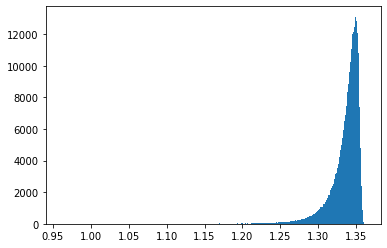

2021-06-04 14:27:37,605 INFO Begin Rotational Alignment of 4096 Classes
2021-06-04 14:29:00,288 INFO Classification Complete


In [7]:
# Running the classification takes some time, mainly in the alignment stage.
result = rir.classify()

logger.info('Classification Complete')


2021-06-04 14:29:22,313 INFO Applying forward transformations in pipeline
2021-06-04 14:29:22,314 INFO All forward transformations applied
2021-06-04 14:29:22,315 INFO Loaded 4096 images
2021-06-04 14:29:22,315 INFO Classed Sample:
2021-06-04 14:29:22,351 INFO Class 0 after rot/refl


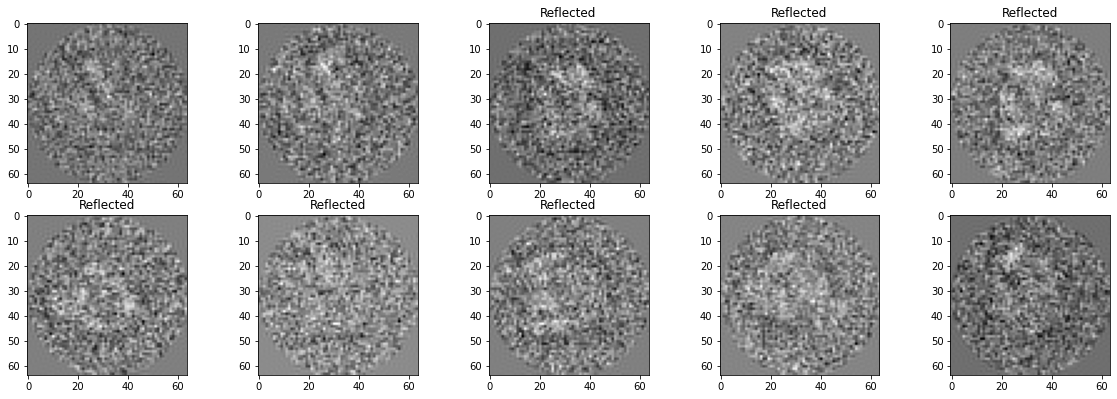

2021-06-04 14:29:23,393 INFO Class 1 after rot/refl


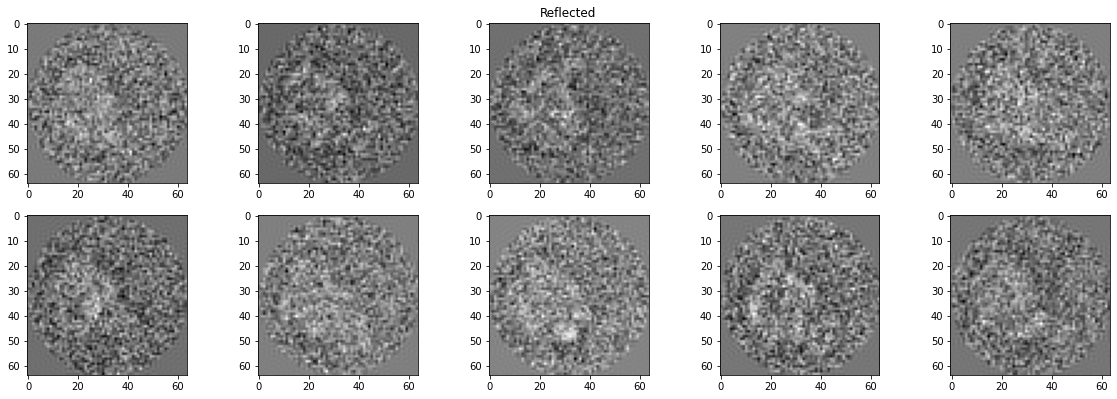

2021-06-04 14:29:24,459 INFO Class 2 after rot/refl


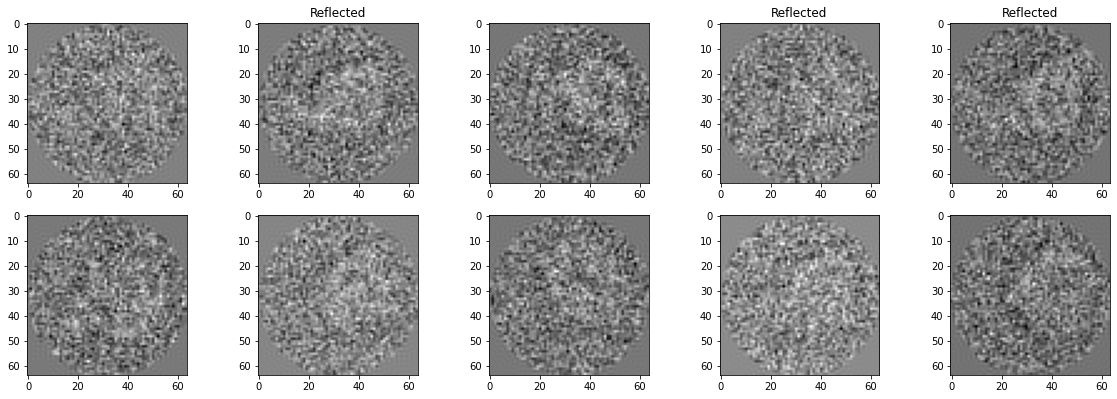

2021-06-04 14:29:25,389 INFO Class 3 after rot/refl


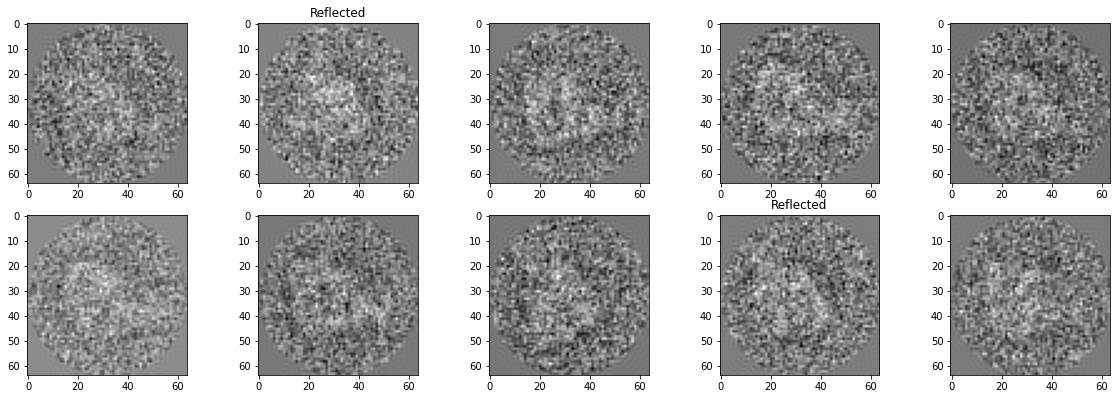

2021-06-04 14:29:26,324 INFO Class 4 after rot/refl


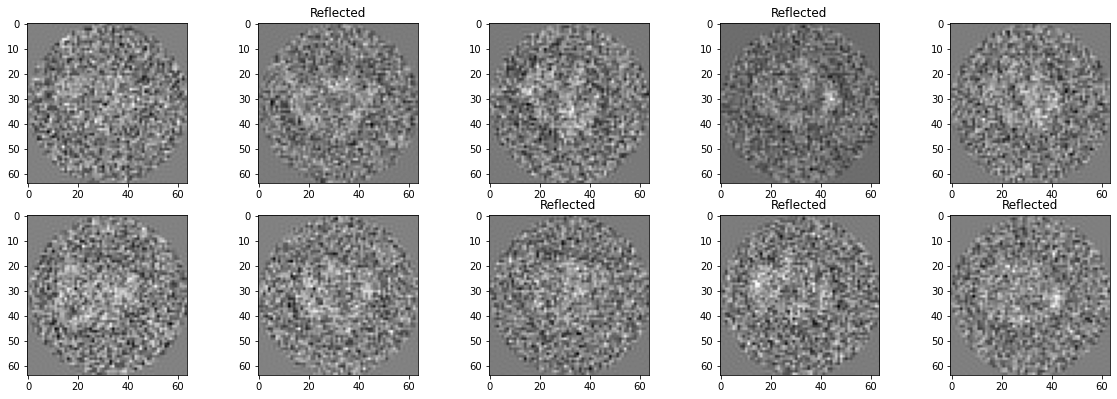

In [8]:
# We can review the resulting classes if we like. (Otherwise safe to skip this cell)
# It has been helpful to review the results manually.
# We are approaching the point where we need to something more clever (corrs/distributions).

# Unpack for review/debugging
classes, class_refl, rot, corr = result

def plot_helper(img, refl, columns=5, figsize=(20, 10)):
    import matplotlib.pyplot as plt

    plt.figure(figsize=figsize)
    for i, im in enumerate(img):
        plt.subplot(img.n_images // columns + 1, columns, i + 1)
        if refl[i]:
            plt.title("Reflected")
        plt.imshow(im, cmap="gray")
    plt.show()

# Lets peek at first couple image classes:
#   specifically for each class, thefirst ten nearest neighbors
Orig = src.images(0, NUMBER_OF_TEST_IMAGES)

include_refl = True  # I'll have to get some help regarding the reflected set. I don't like the results.

logger.info("Classed Sample:")
for c in range(5):
    # If we select just the non reflected neighbors things seem reasonable.
    if include_refl:
        neighbors = classes[c][:10]
    else:
        logger.info("Ignoring Reflected matches")
        selection = class_refl[c] == False
        neighbors = classes[c][selection][:10]  # not refl

    neighbors_img = Image(Orig[neighbors])

    # logger.info("before rot & refl")
    # neighbors_img.show()

    co = basis.evaluate_t(neighbors_img)
    logger.info(f"Class {c} after rot/refl")
    if include_refl:
        rco = basis.rotate(co, rot[c][:10], class_refl[c][:10])
    else:
        rco = basis.rotate(co, rot[c][selection][:10])  # not refl

    rotated_neighbors_img = basis.evaluate(rco)
    if include_refl:
        plot_helper(rotated_neighbors_img, class_refl[c][:10])
    else:
        rotated_neighbors_img.show()


2021-06-04 14:29:27,307 INFO Averaging
2021-06-04 14:29:27,307 INFO Output include_refl=False. Averaging only unreflected images.
2021-06-04 14:29:27,335 INFO Select 10 Classes from Nearest Neighbors
2021-06-04 14:29:50,188 INFO Applying forward transformations in pipeline
2021-06-04 14:29:50,189 INFO All forward transformations applied
2021-06-04 14:29:50,189 INFO Loaded 4096 images


100%|██████████| 10/10 [00:01<00:00,  6.13it/s]


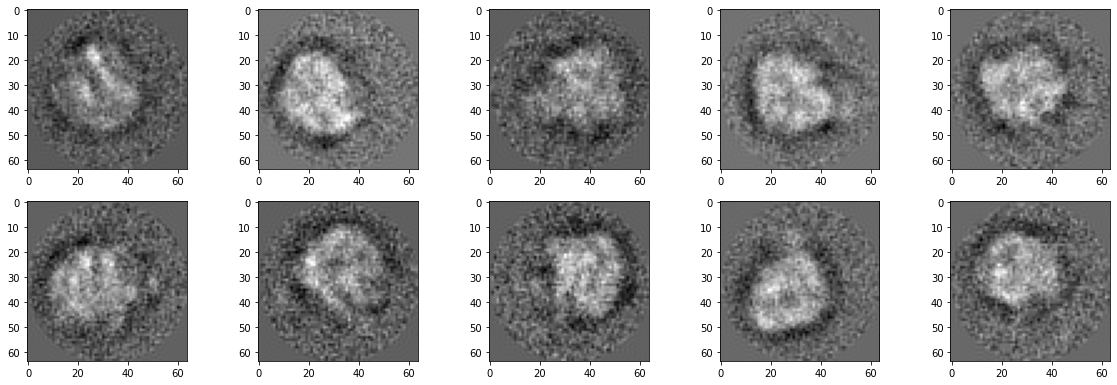

In [9]:
# Averaging

# Right now averaging is done in the `output` method.
# Mainly this is for review/development purposes. Intenionally unoptimized.
# Currently it recreates the image stack, but that's easily cached by the class (optimize later).
# Really we should truncate the set of things we want to align before alignment,
#   but the old codes didn't seem to do that. We do it here using a random sample for now (optimize later).

logger.info("Averaging")
avgs = rir.output(*result[:3], include_refl=False)

# Avgs is an Image so we can peek at it.
avgs.show()


So currently I need to work through a few more things before I consider cleanup for review. Top of list:

* Reflections, they're not working when included in the larger algorithm. I need to go back and verify how they worked in the legacy code. I do have a unit test that I thought was confirming the rotations and reflections of `Steerable` basis (pretty sure it does...).  Maybe it is relating to this `coef_b_r`. I can probably just reflect images in a dumb (run beginning twice) way as well to move things along if needed. Right now I'm still in questioning mode about this `coef_b_r`. There was also a bit of legacy code that rotated reflected images by 180*, but my results were better without that... Both seem like something that needs understanding. This area of the code had a few comments alluding to bugs...
* New bispec code needs importance sampling. Using truncated slabs of bispectrum is still too slow when including enough of slab that accuracy is comparable. Clearly needs importance feature or smarter truncation.  I don't understand that area of the legacy code yet, but we seem to have the supporting data structures since I am able to use them in the legacy implementation with ony a transpose.
* Would like to derive unit test for this that is more than a smoke test, but not a full on demo (like this).
* Should not align whole set. This area is slow and we throw almost all of it out if asking for n_classes<<n_img.


2021-06-04 14:29:52,686 INFO Averaging
2021-06-04 14:29:52,687 INFO Select 10 Classes from Nearest Neighbors
2021-06-04 14:30:15,075 INFO Applying forward transformations in pipeline
2021-06-04 14:30:15,076 INFO All forward transformations applied
2021-06-04 14:30:15,077 INFO Loaded 4096 images


100%|██████████| 10/10 [00:02<00:00,  3.77it/s]


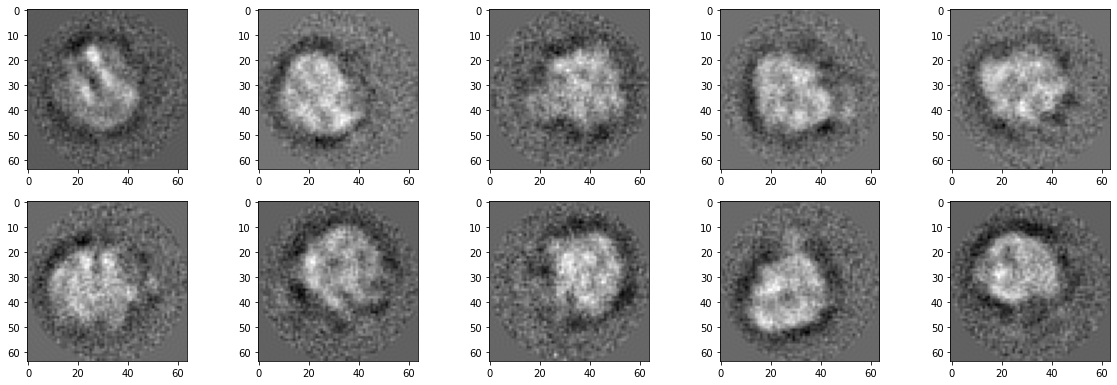

In [10]:


logger.info("Averaging")
avgs = rir.output(*result[:3], include_refl=True)

# Avgs is an Image so we can peek at it.
avgs.show()


2021-06-04 14:30:18,591 INFO Averaging
2021-06-04 14:30:18,591 INFO Output include_refl=False. Averaging only unreflected images.
2021-06-04 14:30:18,618 INFO Select 10 Classes from Nearest Neighbors


100%|██████████| 10/10 [00:00<00:00, 238.34it/s]


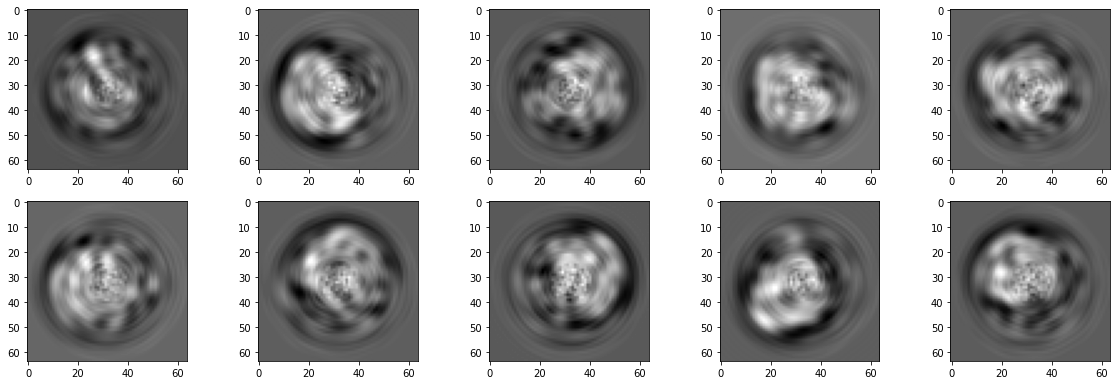

In [11]:

logger.info("Averaging")
avgs = rir.denoised_output(*result[:3], include_refl=False)

# Avgs is an Image so we can peek at it.
avgs.show()


2021-06-04 14:30:19,705 INFO Averaging
2021-06-04 14:30:19,706 INFO Select 10 Classes from Nearest Neighbors


100%|██████████| 10/10 [00:00<00:00, 209.38it/s]


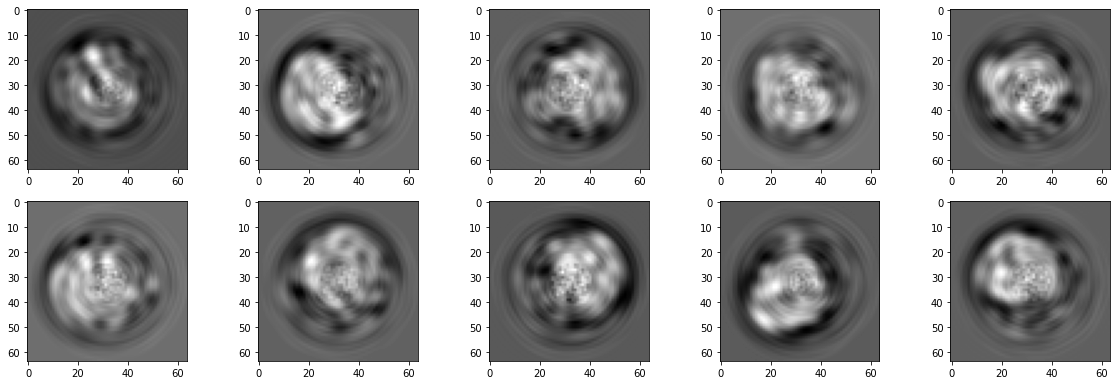

In [12]:

logger.info("Averaging")
avgs = rir.denoised_output(*result[:3], include_refl=True)

# Avgs is an Image so we can peek at it.
avgs.show()
